In [134]:
# Inspiration:
# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
# https://www.otexts.org/fpp/8/1

from pandas import read_csv
from pandas.plotting import autocorrelation_plot
from pandas import DataFrame
from pandas import DateOffset
from datetime import datetime
from matplotlib import pyplot
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose

In [135]:
pyplot.rcParams['figure.figsize'] = (17.0, 17.0)

In [136]:
TIME_SPAN = 120 #minutes        

In [137]:
def unix_parser(x):
    print(x)
    return datetime.fromtimestamp(int(x))

In [138]:
def days_to_num(days):
    '''Convert a number of days into a number of points in our data'''
    assert days >= 0
    
    return (days*24*60)//TIME_SPAN

m = days_to_num(1)    
m

12

In [139]:
def num_to_days(num):
    '''Convert a number of points in our data into a number of days'''
    assert num >= 0
    
    return (num*TIME_SPAN)/60/24

num_to_days(m)   

1.0

In [151]:
series = read_csv('../energyarima/benchmarks/fems20.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=unix_parser).iloc[::24]

['1420066800' '1420067100' '1420067400' ..., '1433109000' '1433109300'
 '1433109600']
1420066800
1420067100
1420067400
1420067700
1420068000
1420068300
1420068600
1420068900
1420069200
1420069500
1420069800
1420070100
1420070400
1420070700
1420071000
1420071300
1420071600
1420071900
1420072200
1420072500
1420072800
1420073100
1420073400
1420073700
1420074000
1420074300
1420074600
1420074900
1420075200
1420075500
1420075800
1420076100
1420076400
1420076700
1420077000
1420077300
1420077600
1420077900
1420078200
1420078500
1420078800
1420079100
1420079400
1420079700
1420080000
1420080300
1420080600
1420080900
1420081200
1420081500
1420081800
1420082100
1420082400
1420082700
1420083000
1420083300
1420083600
1420083900
1420084200
1420084500
1420084800
1420085100
1420085400
1420085700
1420086000
1420086300
1420086600
1420086900
1420087200
1420087500
1420087800
1420088100
1420088400
1420088700
1420089000
1420089300
1420089600
1420089900
1420090200
1420090500
1420090800
1420091100
1420091400
1

1420469100
1420469400
1420469700
1420470000
1420470300
1420470600
1420470900
1420471200
1420471500
1420471800
1420472100
1420472400
1420472700
1420473000
1420473300
1420473600
1420473900
1420474200
1420474500
1420474800
1420475100
1420475400
1420475700
1420476000
1420476300
1420476600
1420476900
1420477200
1420477500
1420477800
1420478100
1420478400
1420478700
1420479000
1420479300
1420479600
1420479900
1420480200
1420480500
1420480800
1420481100
1420481400
1420481700
1420482000
1420482300
1420482600
1420482900
1420483200
1420483500
1420483800
1420484100
1420484400
1420484700
1420485000
1420485300
1420485600
1420485900
1420486200
1420486500
1420486800
1420487100
1420487400
1420487700
1420488000
1420488300
1420488600
1420488900
1420489200
1420489500
1420489800
1420490100
1420490400
1420490700
1420491000
1420491300
1420491600
1420491900
1420492200
1420492500
1420492800
1420493100
1420493400
1420493700
1420494000
1420494300
1420494600
1420494900
1420495200
1420495500
1420495800
1420496100

1421213100
1421213400
1421213700
1421214000
1421214300
1421214600
1421214900
1421215200
1421215500
1421215800
1421216100
1421216400
1421216700
1421217000
1421217300
1421217600
1421217900
1421218200
1421218500
1421218800
1421219100
1421219400
1421219700
1421220000
1421220300
1421220600
1421220900
1421221200
1421221500
1421221800
1421222100
1421222400
1421222700
1421223000
1421223300
1421223600
1421223900
1421224200
1421224500
1421224800
1421225100
1421225400
1421225700
1421226000
1421226300
1421226600
1421226900
1421227200
1421227500
1421227800
1421228100
1421228400
1421228700
1421229000
1421229300
1421229600
1421229900
1421230200
1421230500
1421230800
1421231100
1421231400
1421231700
1421232000
1421232300
1421232600
1421232900
1421233200
1421233500
1421233800
1421234100
1421234400
1421234700
1421235000
1421235300
1421235600
1421235900
1421236200
1421236500
1421236800
1421237100
1421237400
1421237700
1421238000
1421238300
1421238600
1421238900
1421239200
1421239500
1421239800
1421240100

1421493900
1421494200
1421494500
1421494800
1421495100
1421495400
1421495700
1421496000
1421496300
1421496600
1421496900
1421497200
1421497500
1421497800
1421498100
1421498400
1421498700
1421499000
1421499300
1421499600
1421499900
1421500200
1421500500
1421500800
1421501100
1421501400
1421501700
1421502000
1421502300
1421502600
1421502900
1421503200
1421503500
1421503800
1421504100
1421504400
1421504700
1421505000
1421505300
1421505600
1421505900
1421506200
1421506500
1421506800
1421507100
1421507400
1421507700
1421508000
1421508300
1421508600
1421508900
1421509200
1421509500
1421509800
1421510100
1421510400
1421510700
1421511000
1421511300
1421511600
1421511900
1421512200
1421512500
1421512800
1421513100
1421513400
1421513700
1421514000
1421514300
1421514600
1421514900
1421515200
1421515500
1421515800
1421516100
1421516400
1421516700
1421517000
1421517300
1421517600
1421517900
1421518200
1421518500
1421518800
1421519100
1421519400
1421519700
1421520000
1421520300
1421520600
1421520900

1422154500
1422154800
1422155100
1422155400
1422155700
1422156000
1422156300
1422156600
1422156900
1422157200
1422157500
1422157800
1422158100
1422158400
1422158700
1422159000
1422159300
1422159600
1422159900
1422160200
1422160500
1422160800
1422161100
1422161400
1422161700
1422162000
1422162300
1422162600
1422162900
1422163200
1422163500
1422163800
1422164100
1422164400
1422164700
1422165000
1422165300
1422165600
1422165900
1422166200
1422166500
1422166800
1422167100
1422167400
1422167700
1422168000
1422168300
1422168600
1422168900
1422169200
1422169500
1422169800
1422170100
1422170400
1422170700
1422171000
1422171300
1422171600
1422171900
1422172200
1422172500
1422172800
1422173100
1422173400
1422173700
1422174000
1422174300
1422174600
1422174900
1422175200
1422175500
1422175800
1422176100
1422176400
1422176700
1422177000
1422177300
1422177600
1422177900
1422178200
1422178500
1422178800
1422179100
1422179400
1422179700
1422180000
1422180300
1422180600
1422180900
1422181200
1422181500

1422936600
1422936900
1422937200
1422937500
1422937800
1422938100
1422938400
1422938700
1422939000
1422939300
1422939600
1422939900
1422940200
1422940500
1422940800
1422941100
1422941400
1422941700
1422942000
1422942300
1422942600
1422942900
1422943200
1422943500
1422943800
1422944100
1422944400
1422944700
1422945000
1422945300
1422945600
1422945900
1422946200
1422946500
1422946800
1422947100
1422947400
1422947700
1422948000
1422948300
1422948600
1422948900
1422949200
1422949500
1422949800
1422950100
1422950400
1422950700
1422951000
1422951300
1422951600
1422951900
1422952200
1422952500
1422952800
1422953100
1422953400
1422953700
1422954000
1422954300
1422954600
1422954900
1422955200
1422955500
1422955800
1422956100
1422956400
1422956700
1422957000
1422957300
1422957600
1422957900
1422958200
1422958500
1422958800
1422959100
1422959400
1422959700
1422960000
1422960300
1422960600
1422960900
1422961200
1422961500
1422961800
1422962100
1422962400
1422962700
1422963000
1422963300
1422963600

1423653900
1423654200
1423654500
1423654800
1423655100
1423655400
1423655700
1423656000
1423656300
1423656600
1423656900
1423657200
1423657500
1423657800
1423658100
1423658400
1423658700
1423659000
1423659300
1423659600
1423659900
1423660200
1423660500
1423660800
1423661100
1423661400
1423661700
1423662000
1423662300
1423662600
1423662900
1423663200
1423663500
1423663800
1423664100
1423664400
1423664700
1423665000
1423665300
1423665600
1423665900
1423666200
1423666500
1423666800
1423667100
1423667400
1423667700
1423668000
1423668300
1423668600
1423668900
1423669200
1423669500
1423669800
1423670100
1423670400
1423670700
1423671000
1423671300
1423671600
1423671900
1423672200
1423672500
1423672800
1423673100
1423673400
1423673700
1423674000
1423674300
1423674600
1423674900
1423675200
1423675500
1423675800
1423676100
1423676400
1423676700
1423677000
1423677300
1423677600
1423677900
1423678200
1423678500
1423678800
1423679100
1423679400
1423679700
1423680000
1423680300
1423680600
1423680900

1424426700
1424427000
1424427300
1424427600
1424427900
1424428200
1424428500
1424428800
1424429100
1424429400
1424429700
1424430000
1424430300
1424430600
1424430900
1424431200
1424431500
1424431800
1424432100
1424432400
1424432700
1424433000
1424433300
1424433600
1424433900
1424434200
1424434500
1424434800
1424435100
1424435400
1424435700
1424436000
1424436300
1424436600
1424436900
1424437200
1424437500
1424437800
1424438100
1424438400
1424438700
1424439000
1424439300
1424439600
1424439900
1424440200
1424440500
1424440800
1424441100
1424441400
1424441700
1424442000
1424442300
1424442600
1424442900
1424443200
1424443500
1424443800
1424444100
1424444400
1424444700
1424445000
1424445300
1424445600
1424445900
1424446200
1424446500
1424446800
1424447100
1424447400
1424447700
1424448000
1424448300
1424448600
1424448900
1424449200
1424449500
1424449800
1424450100
1424450400
1424450700
1424451000
1424451300
1424451600
1424451900
1424452200
1424452500
1424452800
1424453100
1424453400
1424453700

1425219900
1425220200
1425220500
1425220800
1425221100
1425221400
1425221700
1425222000
1425222300
1425222600
1425222900
1425223200
1425223500
1425223800
1425224100
1425224400
1425224700
1425225000
1425225300
1425225600
1425225900
1425226200
1425226500
1425226800
1425227100
1425227400
1425227700
1425228000
1425228300
1425228600
1425228900
1425229200
1425229500
1425229800
1425230100
1425230400
1425230700
1425231000
1425231300
1425231600
1425231900
1425232200
1425232500
1425232800
1425233100
1425233400
1425233700
1425234000
1425234300
1425234600
1425234900
1425235200
1425235500
1425235800
1425236100
1425236400
1425236700
1425237000
1425237300
1425237600
1425237900
1425238200
1425238500
1425238800
1425239100
1425239400
1425239700
1425240000
1425240300
1425240600
1425240900
1425241200
1425241500
1425241800
1425242100
1425242400
1425242700
1425243000
1425243300
1425243600
1425243900
1425244200
1425244500
1425244800
1425245100
1425245400
1425245700
1425246000
1425246300
1425246600
1425246900

1425975900
1425976200
1425976500
1425976800
1425977100
1425977400
1425977700
1425978000
1425978300
1425978600
1425978900
1425979200
1425979500
1425979800
1425980100
1425980400
1425980700
1425981000
1425981300
1425981600
1425981900
1425982200
1425982500
1425982800
1425983100
1425983400
1425983700
1425984000
1425984300
1425984600
1425984900
1425985200
1425985500
1425985800
1425986100
1425986400
1425986700
1425987000
1425987300
1425987600
1425987900
1425988200
1425988500
1425988800
1425989100
1425989400
1425989700
1425990000
1425990300
1425990600
1425990900
1425991200
1425991500
1425991800
1425992100
1425992400
1425992700
1425993000
1425993300
1425993600
1425993900
1425994200
1425994500
1425994800
1425995100
1425995400
1425995700
1425996000
1425996300
1425996600
1425996900
1425997200
1425997500
1425997800
1425998100
1425998400
1425998700
1425999000
1425999300
1425999600
1425999900
1426000200
1426000500
1426000800
1426001100
1426001400
1426001700
1426002000
1426002300
1426002600
1426002900

1426641900
1426642200
1426642500
1426642800
1426643100
1426643400
1426643700
1426644000
1426644300
1426644600
1426644900
1426645200
1426645500
1426645800
1426646100
1426646400
1426646700
1426647000
1426647300
1426647600
1426647900
1426648200
1426648500
1426648800
1426649100
1426649400
1426649700
1426650000
1426650300
1426650600
1426650900
1426651200
1426651500
1426651800
1426652100
1426652400
1426652700
1426653000
1426653300
1426653600
1426653900
1426654200
1426654500
1426654800
1426655100
1426655400
1426655700
1426656000
1426656300
1426656600
1426656900
1426657200
1426657500
1426657800
1426658100
1426658400
1426658700
1426659000
1426659300
1426659600
1426659900
1426660200
1426660500
1426660800
1426661100
1426661400
1426661700
1426662000
1426662300
1426662600
1426662900
1426663200
1426663500
1426663800
1426664100
1426664400
1426664700
1426665000
1426665300
1426665600
1426665900
1426666200
1426666500
1426666800
1426667100
1426667400
1426667700
1426668000
1426668300
1426668600
1426668900

1427385600
1427385900
1427386200
1427386500
1427386800
1427387100
1427387400
1427387700
1427388000
1427388300
1427388600
1427388900
1427389200
1427389500
1427389800
1427390100
1427390400
1427390700
1427391000
1427391300
1427391600
1427391900
1427392200
1427392500
1427392800
1427393100
1427393400
1427393700
1427394000
1427394300
1427394600
1427394900
1427395200
1427395500
1427395800
1427396100
1427396400
1427396700
1427397000
1427397300
1427397600
1427397900
1427398200
1427398500
1427398800
1427399100
1427399400
1427399700
1427400000
1427400300
1427400600
1427400900
1427401200
1427401500
1427401800
1427402100
1427402400
1427402700
1427403000
1427403300
1427403600
1427403900
1427404200
1427404500
1427404800
1427405100
1427405400
1427405700
1427406000
1427406300
1427406600
1427406900
1427407200
1427407500
1427407800
1427408100
1427408400
1427408700
1427409000
1427409300
1427409600
1427409900
1427410200
1427410500
1427410800
1427411100
1427411400
1427411700
1427412000
1427412300
1427412600

1428242100
1428242400
1428242700
1428243000
1428243300
1428243600
1428243900
1428244200
1428244500
1428244800
1428245100
1428245400
1428245700
1428246000
1428246300
1428246600
1428246900
1428247200
1428247500
1428247800
1428248100
1428248400
1428248700
1428249000
1428249300
1428249600
1428249900
1428250200
1428250500
1428250800
1428251100
1428251400
1428251700
1428252000
1428252300
1428252600
1428252900
1428253200
1428253500
1428253800
1428254100
1428254400
1428254700
1428255000
1428255300
1428255600
1428255900
1428256200
1428256500
1428256800
1428257100
1428257400
1428257700
1428258000
1428258300
1428258600
1428258900
1428259200
1428259500
1428259800
1428260100
1428260400
1428260700
1428261000
1428261300
1428261600
1428261900
1428262200
1428262500
1428262800
1428263100
1428263400
1428263700
1428264000
1428264300
1428264600
1428264900
1428265200
1428265500
1428265800
1428266100
1428266400
1428266700
1428267000
1428267300
1428267600
1428267900
1428268200
1428268500
1428268800
1428269100

1428918600
1428918900
1428919200
1428919500
1428919800
1428920100
1428920400
1428920700
1428921000
1428921300
1428921600
1428921900
1428922200
1428922500
1428922800
1428923100
1428923400
1428923700
1428924000
1428924300
1428924600
1428924900
1428925200
1428925500
1428925800
1428926100
1428926400
1428926700
1428927000
1428927300
1428927600
1428927900
1428928200
1428928500
1428928800
1428929100
1428929400
1428929700
1428930000
1428930300
1428930600
1428930900
1428931200
1428931500
1428931800
1428932100
1428932400
1428932700
1428933000
1428933300
1428933600
1428933900
1428934200
1428934500
1428934800
1428935100
1428935400
1428935700
1428936000
1428936300
1428936600
1428936900
1428937200
1428937500
1428937800
1428938100
1428938400
1428938700
1428939000
1428939300
1428939600
1428939900
1428940200
1428940500
1428940800
1428941100
1428941400
1428941700
1428942000
1428942300
1428942600
1428942900
1428943200
1428943500
1428943800
1428944100
1428944400
1428944700
1428945000
1428945300
1428945600

1429592700
1429593000
1429593300
1429593600
1429593900
1429594200
1429594500
1429594800
1429595100
1429595400
1429595700
1429596000
1429596300
1429596600
1429596900
1429597200
1429597500
1429597800
1429598100
1429598400
1429598700
1429599000
1429599300
1429599600
1429599900
1429600200
1429600500
1429600800
1429601100
1429601400
1429601700
1429602000
1429602300
1429602600
1429602900
1429603200
1429603500
1429603800
1429604100
1429604400
1429604700
1429605000
1429605300
1429605600
1429605900
1429606200
1429606500
1429606800
1429607100
1429607400
1429607700
1429608000
1429608300
1429608600
1429608900
1429609200
1429609500
1429609800
1429610100
1429610400
1429610700
1429611000
1429611300
1429611600
1429611900
1429612200
1429612500
1429612800
1429613100
1429613400
1429613700
1429614000
1429614300
1429614600
1429614900
1429615200
1429615500
1429615800
1429616100
1429616400
1429616700
1429617000
1429617300
1429617600
1429617900
1429618200
1429618500
1429618800
1429619100
1429619400
1429619700

1430214900
1430215200
1430215500
1430215800
1430216100
1430216400
1430216700
1430217000
1430217300
1430217600
1430217900
1430218200
1430218500
1430218800
1430219100
1430219400
1430219700
1430220000
1430220300
1430220600
1430220900
1430221200
1430221500
1430221800
1430222100
1430222400
1430222700
1430223000
1430223300
1430223600
1430223900
1430224200
1430224500
1430224800
1430225100
1430225400
1430225700
1430226000
1430226300
1430226600
1430226900
1430227200
1430227500
1430227800
1430228100
1430228400
1430228700
1430229000
1430229300
1430229600
1430229900
1430230200
1430230500
1430230800
1430231100
1430231400
1430231700
1430232000
1430232300
1430232600
1430232900
1430233200
1430233500
1430233800
1430234100
1430234400
1430234700
1430235000
1430235300
1430235600
1430235900
1430236200
1430236500
1430236800
1430237100
1430237400
1430237700
1430238000
1430238300
1430238600
1430238900
1430239200
1430239500
1430239800
1430240100
1430240400
1430240700
1430241000
1430241300
1430241600
1430241900

1431081900
1431082200
1431082500
1431082800
1431083100
1431083400
1431083700
1431084000
1431084300
1431084600
1431084900
1431085200
1431085500
1431085800
1431086100
1431086400
1431086700
1431087000
1431087300
1431087600
1431087900
1431088200
1431088500
1431088800
1431089100
1431089400
1431089700
1431090000
1431090300
1431090600
1431090900
1431091200
1431091500
1431091800
1431092100
1431092400
1431092700
1431093000
1431093300
1431093600
1431093900
1431094200
1431094500
1431094800
1431095100
1431095400
1431095700
1431096000
1431096300
1431096600
1431096900
1431097200
1431097500
1431097800
1431098100
1431098400
1431098700
1431099000
1431099300
1431099600
1431099900
1431100200
1431100500
1431100800
1431101100
1431101400
1431101700
1431102000
1431102300
1431102600
1431102900
1431103200
1431103500
1431103800
1431104100
1431104400
1431104700
1431105000
1431105300
1431105600
1431105900
1431106200
1431106500
1431106800
1431107100
1431107400
1431107700
1431108000
1431108300
1431108600
1431108900

1431697800
1431698100
1431698400
1431698700
1431699000
1431699300
1431699600
1431699900
1431700200
1431700500
1431700800
1431701100
1431701400
1431701700
1431702000
1431702300
1431702600
1431702900
1431703200
1431703500
1431703800
1431704100
1431704400
1431704700
1431705000
1431705300
1431705600
1431705900
1431706200
1431706500
1431706800
1431707100
1431707400
1431707700
1431708000
1431708300
1431708600
1431708900
1431709200
1431709500
1431709800
1431710100
1431710400
1431710700
1431711000
1431711300
1431711600
1431711900
1431712200
1431712500
1431712800
1431713100
1431713400
1431713700
1431714000
1431714300
1431714600
1431714900
1431715200
1431715500
1431715800
1431716100
1431716400
1431716700
1431717000
1431717300
1431717600
1431717900
1431718200
1431718500
1431718800
1431719100
1431719400
1431719700
1431720000
1431720300
1431720600
1431720900
1431721200
1431721500
1431721800
1431722100
1431722400
1431722700
1431723000
1431723300
1431723600
1431723900
1431724200
1431724500
1431724800

1432447200
1432447500
1432447800
1432448100
1432448400
1432448700
1432449000
1432449300
1432449600
1432449900
1432450200
1432450500
1432450800
1432451100
1432451400
1432451700
1432452000
1432452300
1432452600
1432452900
1432453200
1432453500
1432453800
1432454100
1432454400
1432454700
1432455000
1432455300
1432455600
1432455900
1432456200
1432456500
1432456800
1432457100
1432457400
1432457700
1432458000
1432458300
1432458600
1432458900
1432459200
1432459500
1432459800
1432460100
1432460400
1432460700
1432461000
1432461300
1432461600
1432461900
1432462200
1432462500
1432462800
1432463100
1432463400
1432463700
1432464000
1432464300
1432464600
1432464900
1432465200
1432465500
1432465800
1432466100
1432466400
1432466700
1432467000
1432467300
1432467600
1432467900
1432468200
1432468500
1432468800
1432469100
1432469400
1432469700
1432470000
1432470300
1432470600
1432470900
1432471200
1432471500
1432471800
1432472100
1432472400
1432472700
1432473000
1432473300
1432473600
1432473900
1432474200

In [141]:
print(series.head())

                     PV1  PV2    Ph1    Ph2    Ph3
timestamp                                         
2015-01-01 01:00:00  0.0  0.0    0.0  352.8  401.2
2015-01-01 03:00:00  0.0  0.0    0.0    0.0    0.0
2015-01-01 05:00:00  0.0  0.0    0.0    0.0    0.0
2015-01-01 07:00:00  0.0  0.0   22.0    0.0  105.0
2015-01-01 09:00:00  0.0  0.0  108.8    0.0  231.8


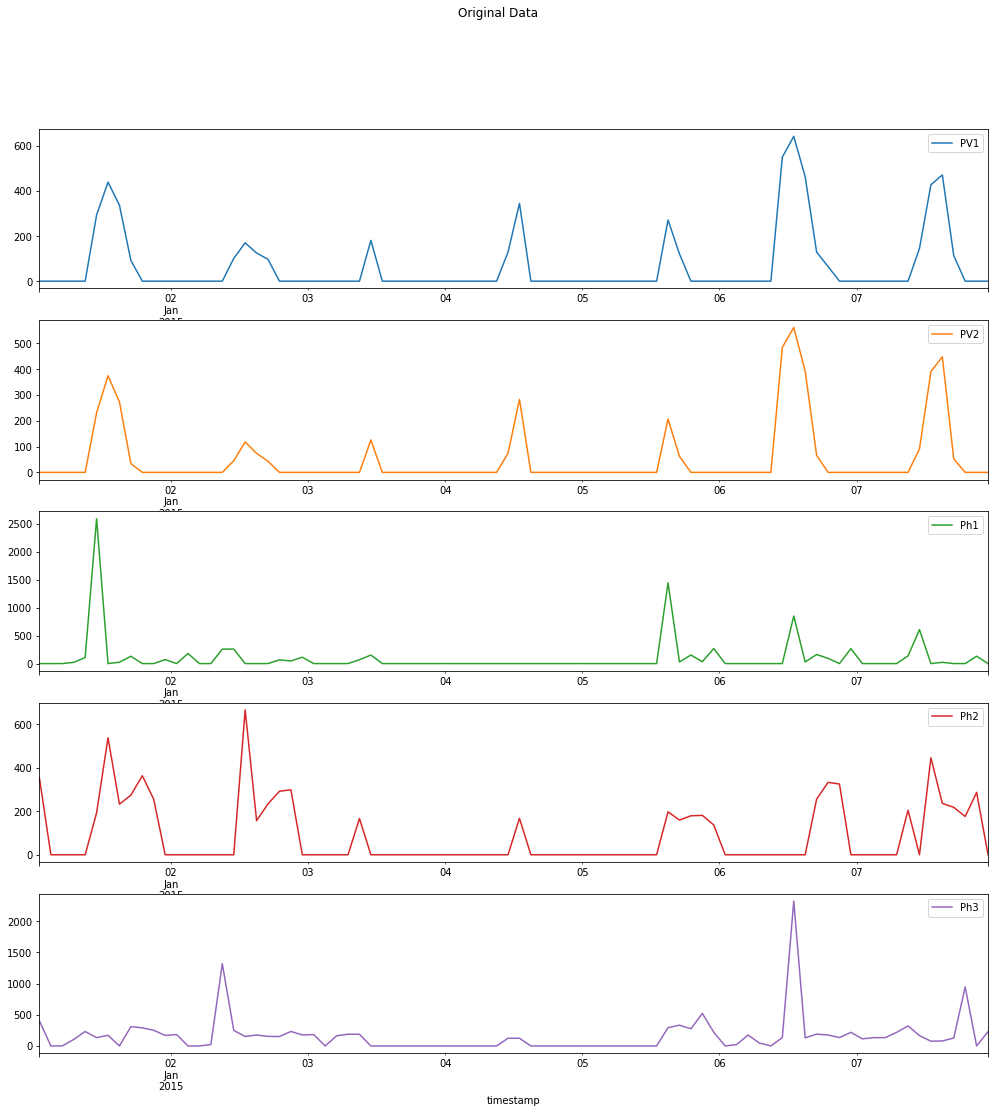

In [142]:
ax = series.iloc[0:days_to_num(7)].plot(subplots=True, sharex=False, title='Original Data', legend='False')
pyplot.show()

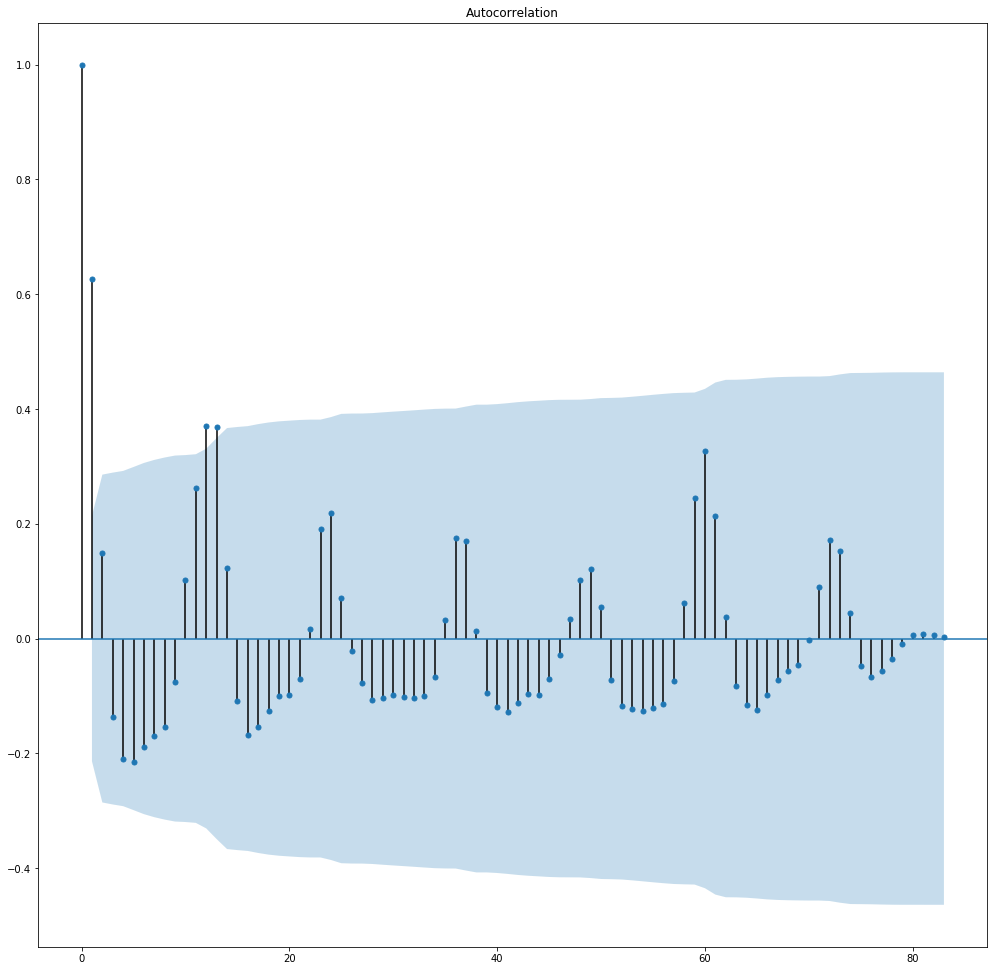

In [143]:
plot_acf(series['PV1'].iloc[0:days_to_num(7)])
pyplot.show()

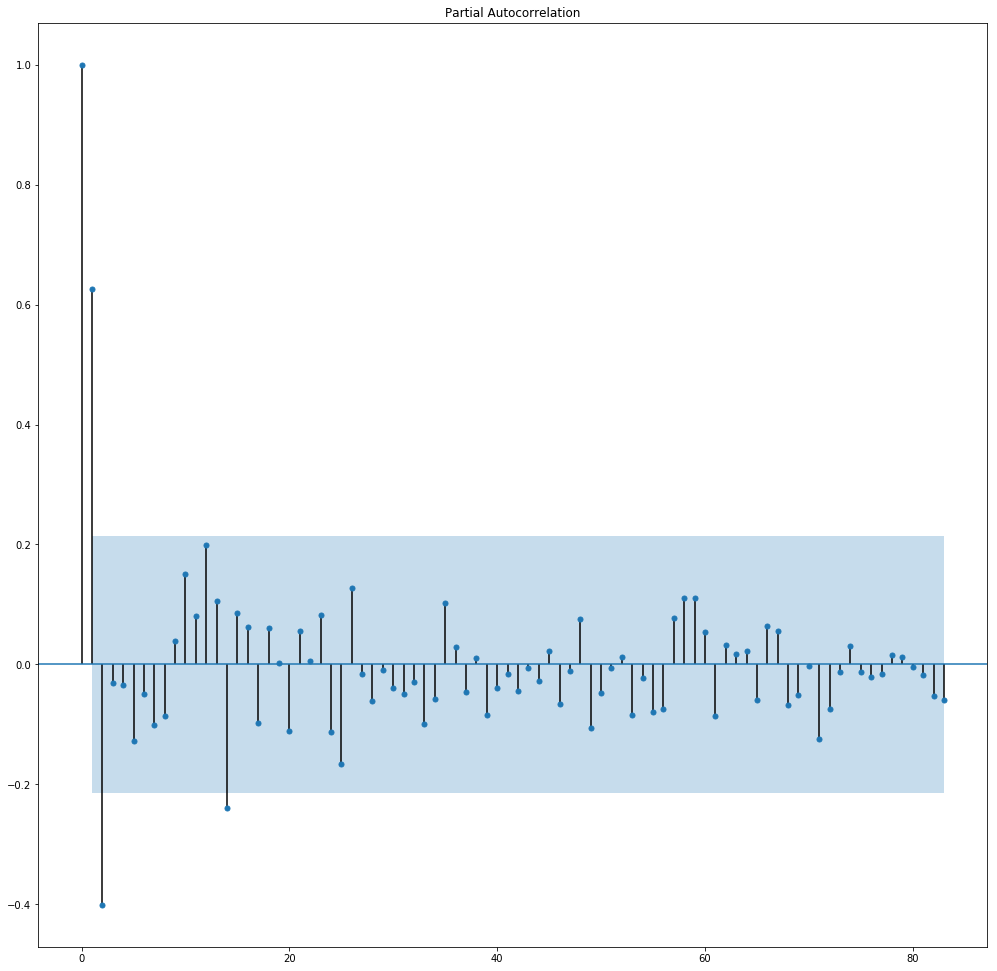

In [144]:
plot_pacf(series['PV1'].iloc[0:days_to_num(7)])
pyplot.show()

                              ARMA Model Results                              
Dep. Variable:                    PV1   No. Observations:                   84
Model:                     ARMA(2, 0)   Log Likelihood                -508.178
Method:                       css-mle   S.D. of innovations            102.089
Date:                Thu, 30 Nov 2017   AIC                           1024.355
Time:                        11:41:51   BIC                           1034.079
Sample:                    01-01-2015   HQIC                          1028.264
                         - 01-07-2015                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.6878     21.271      3.182      0.002      25.998     109.378
ar.L1.PV1      0.8707      0.099      8.774      0.000       0.676       1.065
ar.L2.PV1     -0.3935      0.099     -3.986      0.0

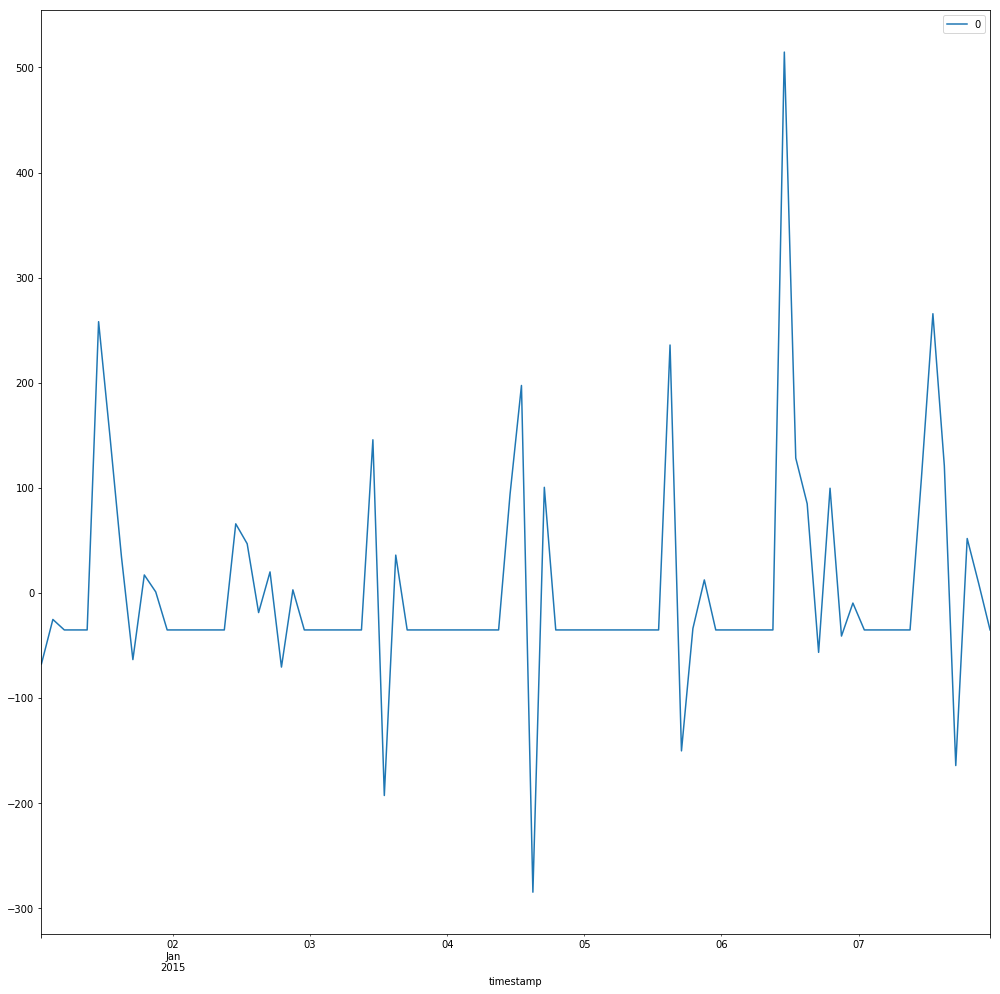

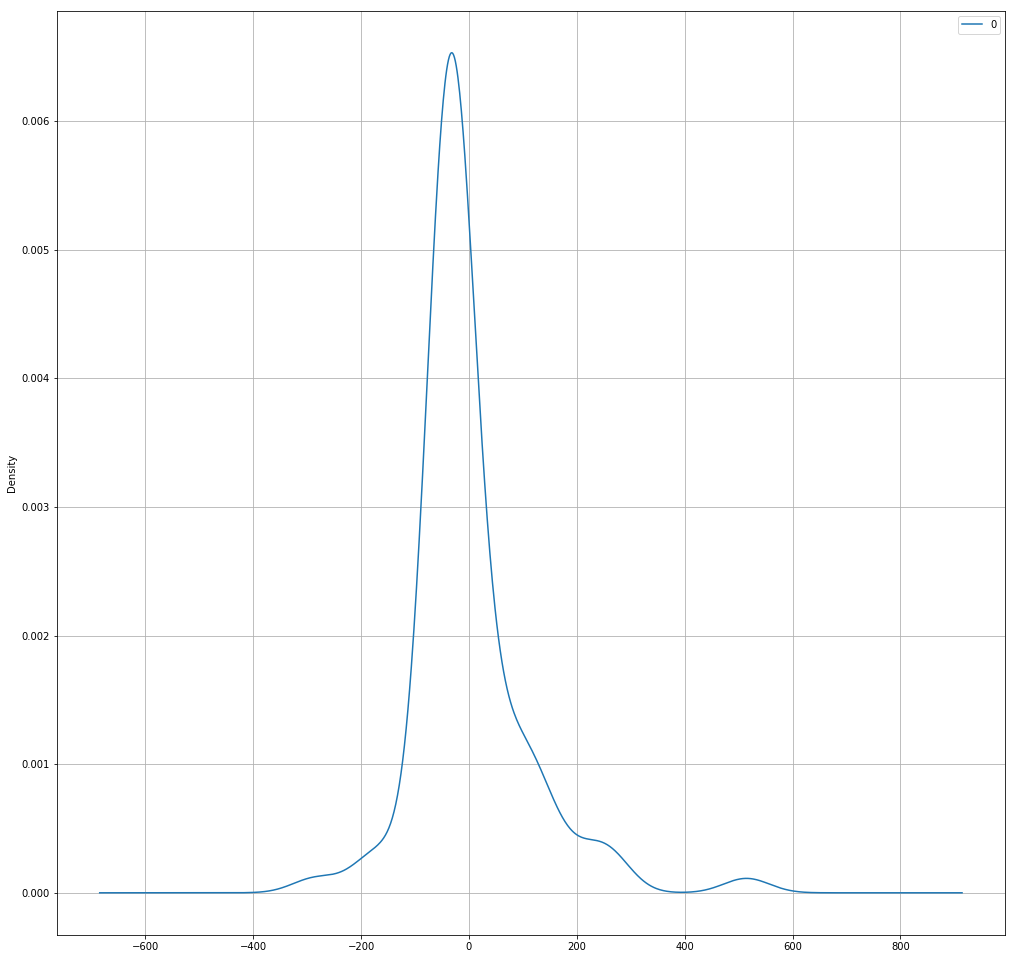

                0
count   84.000000
mean    -0.130971
std    102.838268
min   -285.005143
25%    -35.389169
50%    -35.389169
75%     13.405727
max    514.610831


In [145]:
# fit model
model = ARIMA(series['PV1'].iloc[0:days_to_num(7)], order=(2,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

ax = residuals.plot(kind='kde')
ax.grid(True)
pyplot.show()
print(residuals.describe())

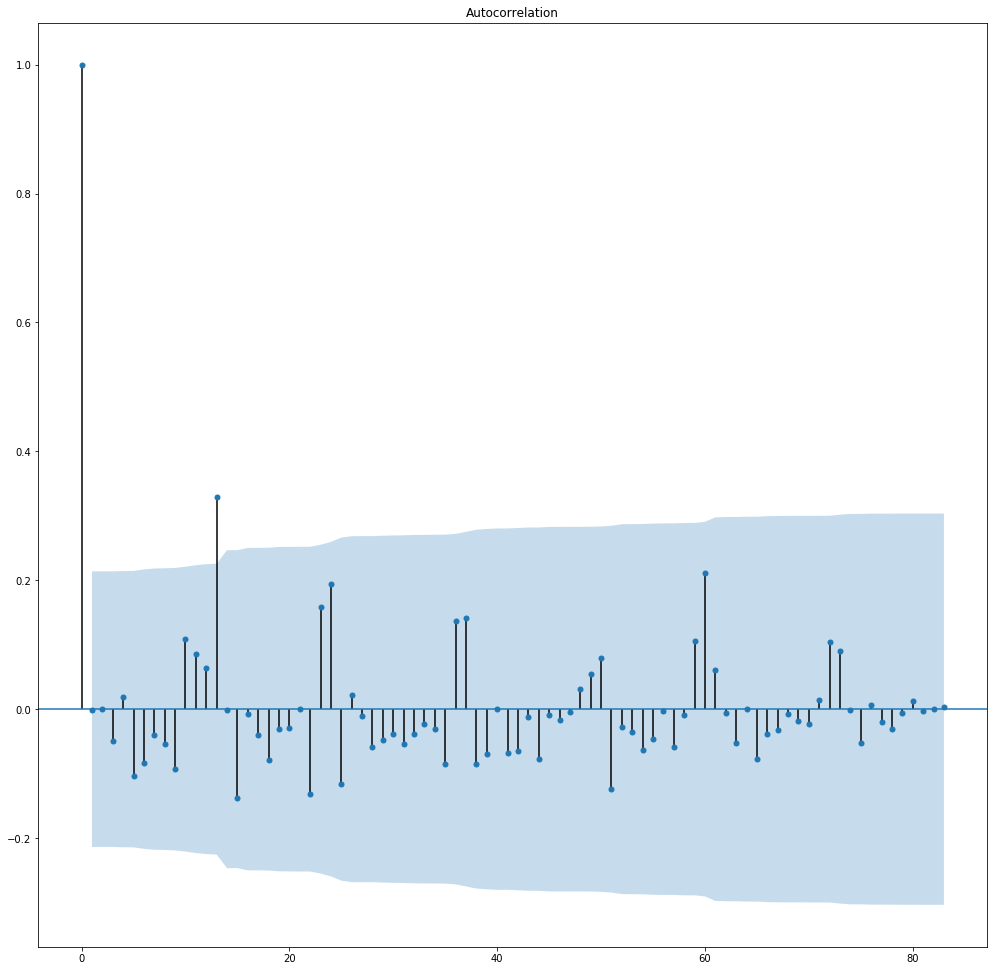

In [146]:
plot_acf(residuals)
pyplot.show()

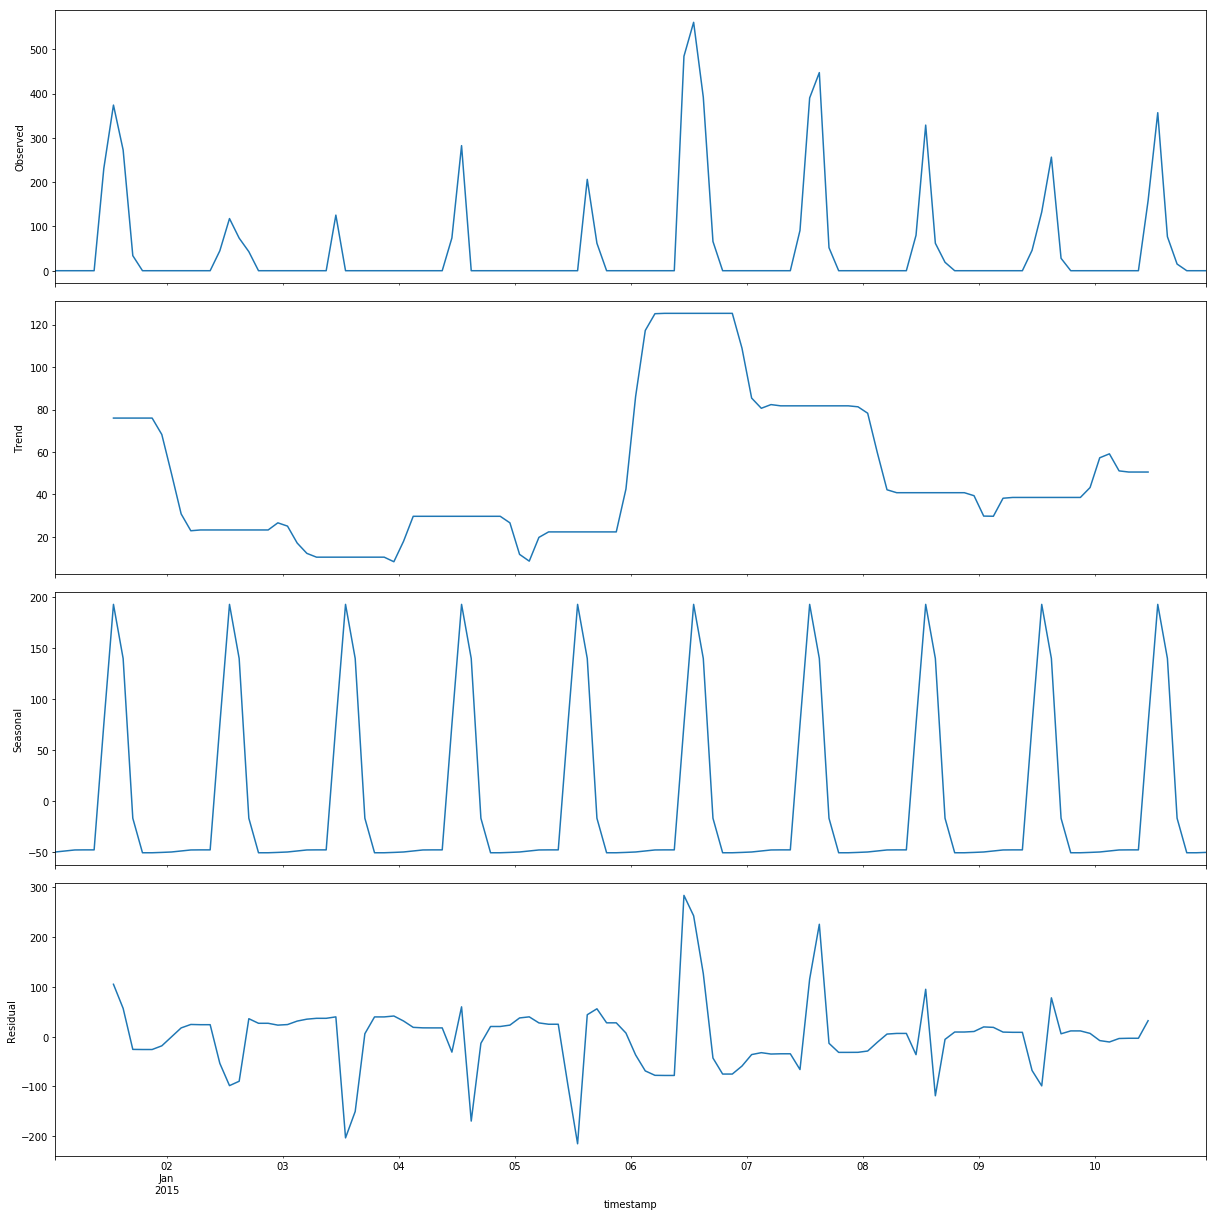

In [147]:
decomposition = seasonal_decompose(series['PV2'].iloc[0:days_to_num(10)], freq=days_to_num(1))  
decomposition.plot() 

                                 Statespace Model Results                                 
Dep. Variable:                                PV1   No. Observations:                   84
Model:             SARIMAX(2, 1, 1)x(2, 1, 0, 12)   Log Likelihood                -431.036
Date:                            Thu, 30 Nov 2017   AIC                            874.072
Time:                                    11:42:41   BIC                            888.657
Sample:                                01-01-2015   HQIC                           879.935
                                     - 01-07-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7428      0.134      5.564      0.000       0.481       1.005
ar.L2         -0.2013      0.132   

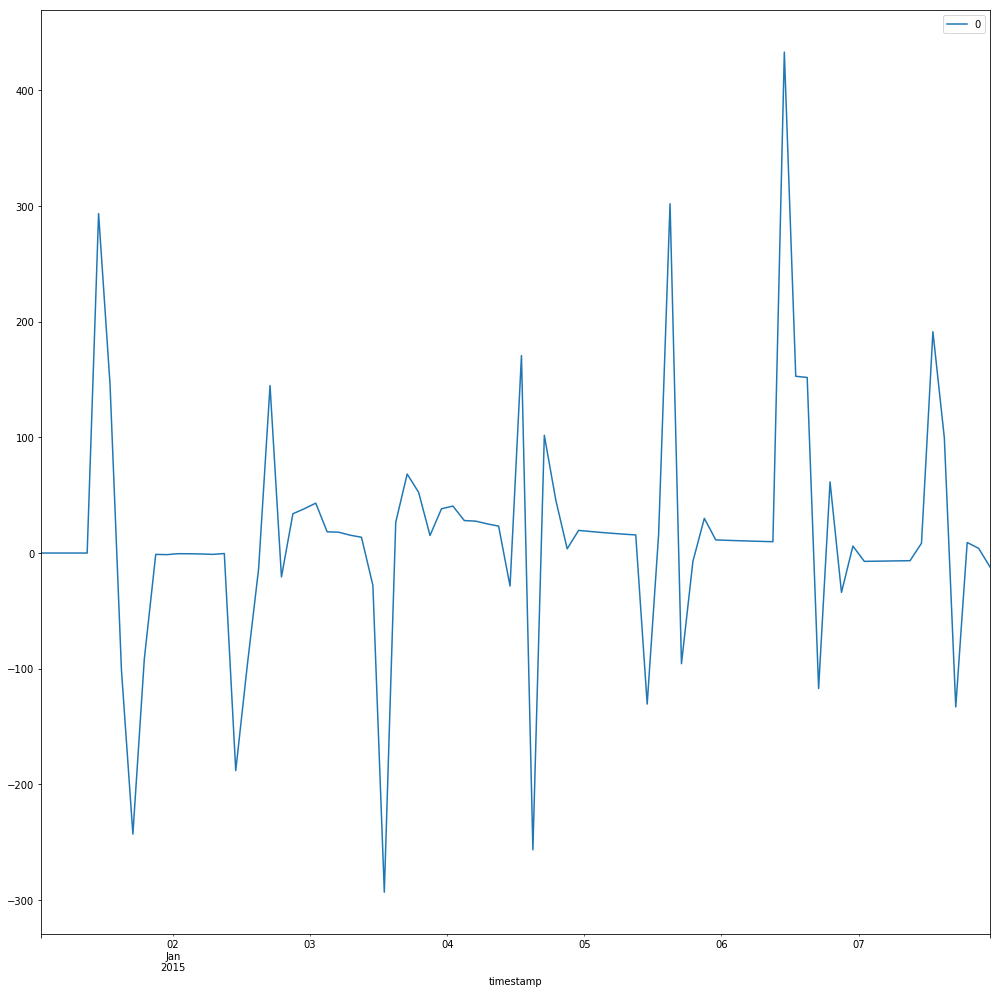

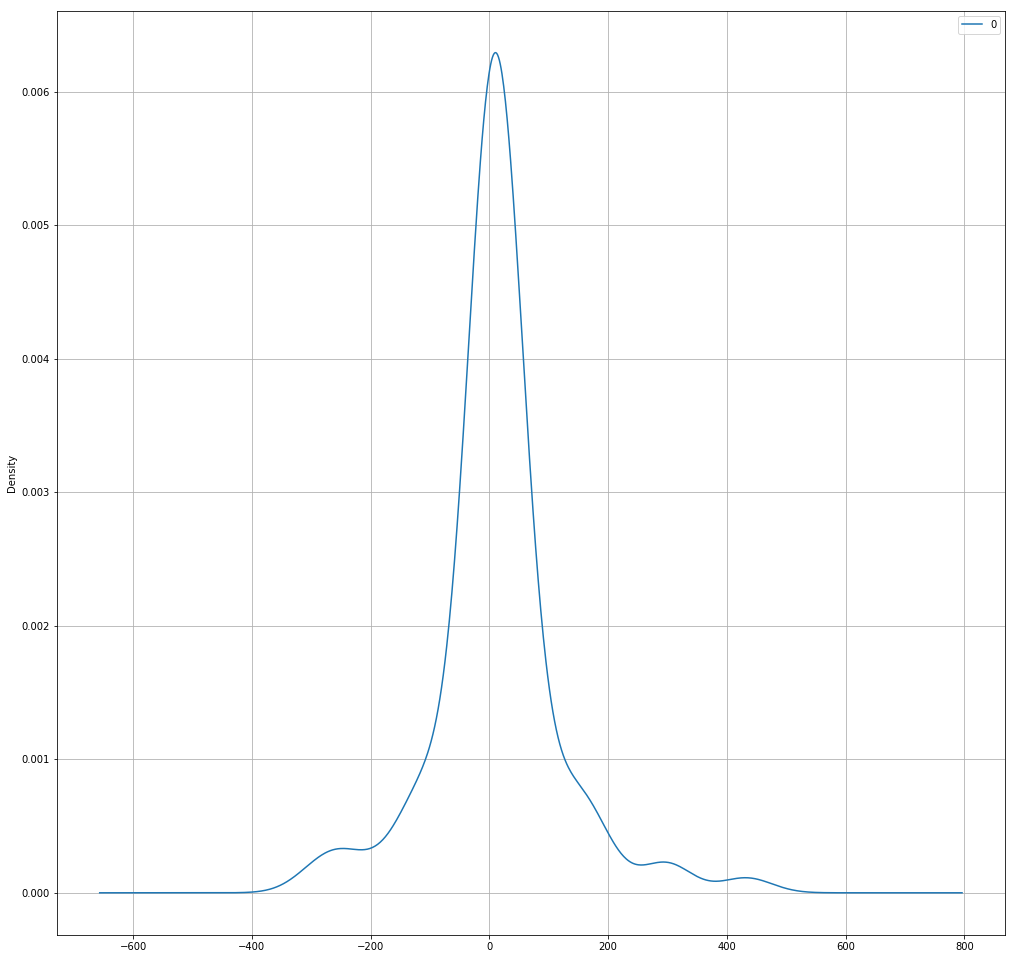

                0
count   84.000000
mean    13.495934
std    103.523325
min   -293.197614
25%     -6.802303
50%     10.206800
75%     28.553067
max    433.060378


In [149]:
s_model = SARIMAX(series['PV1'].iloc[0:days_to_num(7)], order=(2,1,1), seasonal_order=(2, 1, 0, 12))
s_model_fit = s_model.fit(disp=0)
print(s_model_fit.summary())

# plot residual errors
s_residuals = DataFrame(s_model_fit.resid)
s_residuals.plot()
pyplot.show()

ax = s_residuals.plot(kind='kde')
ax.grid(True)
pyplot.show()
print(s_residuals.describe())

In [150]:
#series['PV2'].to_csv('2hrs-pv2.txt', sep='\n', index=False)